# Unsupervised and supervised analysis of protein sequences

- Proteins are large, highly complex and naturally occurring molecules can be found in all living organisms. These unique substances, which consist of amino acids joined together by peptide bonds to form long chains, can have a variety of functions and properties.



## Introduction

In this section we import and we clean the data. We create vectors that we need in the future for the *hot encoding*.

**Importing**

In [ ]:
# Basics
import numpy as np
import pandas as pd
from google.colab import files
import io 
import math 

# Importing
from google.colab import files
#plt.savefig("abc.png")
#files.download("abc.png") 

# Bio lib
!pip install Bio 
from Bio import SeqIO
'''
run the !pip at least once -> so you can install the Bio library. Unfortanetely this library is not
included in colab. -> then you can comment that line (#)
'''

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.2 MB/s eta 0:00:00


'\nrun the !pip at least once -> so you can install the Bio library. Unfortanetely this library is not\nincluded in colab. -> then you can comment that line (#)\n'

In [ ]:
'''
The upload() will ask to upload two files:
  the first should be: MSA_nat_with_annotation.faa
  the second MSA_art.faa
'''
uploaded0 = files.upload()
uploaded1 = files.upload()

Saving MSA_nat_with_annotation.faa to MSA_nat_with_annotation.faa


Saving MSA_art.faa to MSA_art.faa


**Cleaning the data**

In [ ]:
# ad hoc function to clean data

import re
from Bio.SeqIO.FastaIO import SimpleFastaParser 

def read_fasta0(file_path, columns) :
    with open("MSA_nat_with_annotation.faa") as fasta_file :  
        records = [] # create empty list
        for title, sequence in SimpleFastaParser(fasta_file): #SimpleFastaParser Iterate over Fasta records as string tuples. For each record a tuple of two strings is returned, the FASTA title line (without the leading ‘>’ character), and the sequence (with any whitespace removed). 
            record = []
            title_splits=re.findall(r"[\w']+", title) # Data cleaning is needed
          
                 
            
            record.append(title_splits[0])  #First values are ID (Append adds element to a list)
            record.append(len(sequence)) #Second values are sequences lengths
            sequence = " ".join(sequence) #It converts into one line
            record.append(sequence)#Third values are sequences
                
            #Fourth column will contain the species
            if "functional_true" in title_splits:
                    record.append("true")    
            else:
                    record.append("false")
                
           
              
            records.append(record)
    return pd.DataFrame(records, columns = columns) #We have created a function that returns a dataframe





def read_fasta1(file_path, columns) :
    with open("MSA_art.faa") as fasta_file :  
        records = [] # create empty list
        for title, sequence in SimpleFastaParser(fasta_file): #SimpleFastaParser Iterate over Fasta records as string tuples. For each record a tuple of two strings is returned, the FASTA title line (without the leading ‘>’ character), and the sequence (with any whitespace removed). 
            record = []
            title_splits=re.findall(r"[\w']+", title) # Data cleaning is needed
          
                 
            
            record.append(title_splits[0])  #First values are ID (Append adds element to a list)
            record.append(len(sequence)) #Second values are sequences lengths
            sequence = " ".join(sequence) #It converts into one line
            record.append(sequence)#Third values are sequences
                
            #Fourth column will contain the species
            if "functional_true" in title_splits:
                    record.append("true")    
            else:
                    record.append("false")
                
           
              
            records.append(record)
    return pd.DataFrame(records, columns = columns) #We have created a function that returns a dataframe

In [ ]:
# data visualization of our file

#Now let's use this function by inserting in the first argument the file name (or file path if your working directory is different from where the fasta file is)        
#And in the second one the names of columns
data1 = read_fasta1("MSA_art.faa", columns=["id","sequence_length", "sequence", "T/F"])
data0 = read_fasta0("MSA_nat_with_annotation.faa", columns=["id","sequence_length", "sequence", "T/F"])

In [ ]:
data0 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x396 with 0 Axes>

In [ ]:
data1

,id,sequence_length,sequence,T/F
0,sequence_1,96,- - - - - S L E E L R K E I E S I D R E I V E ...,true
1,sequence_2,96,- - - T E R L N E L R D Q I D Q V D K E L L K ...,false
2,sequence_3,96,- - T D N P L L A L R E K I S A L D L K L L D ...,true
3,sequence_4,96,E D V E E T L K P H R D K I D A I D D A V L K ...,true
4,sequence_5,96,E E Y N N K L E T L R A Q I D V V D H Q L I E ...,true
...,...,...,...,...
998,sequence_999,96,E E L N L K L K P L R E R I D A I D R Q I I T ...,true
999,sequence_1000,96,- - - - - D L T D V R S A I D Q I D A Q I L D ...,true
1000,sequence_1001,96,H Q T T E G L H Q L R G Q I D E I D N S L M E ...,true
1001,sequence_1002,96,- - - - K D L K Y L R D E I D K I D K E M I K ...,true


In [ ]:
# let's play with data to understand what's in our dataframe:

data0['sequence'][3] #this plots the fourth sequence. 
# the first [] calls the section of the object we want to call, the second [] calls the numeber of the sequence. 

print(data0['T/F'][3]) #this plots the label of the sequence
type(data0['T/F'][3])
len(data0)

true


1130

**We create now a matrix that contains only the sequences**

In [ ]:
# creating a matrix with all the sequences:

#number of rows and columns
n_row0 = len(data0) 
n_row1 = len(data1) #number of sequences
n_columns = 96 #length of sequences

# initialazing our matrices
seq_matrix_0 = np.empty((n_row0, n_columns), dtype=str)
seq_matrix_1 = np.empty((n_row1, n_columns), dtype=str)

In [ ]:
# creating the matrix for first and second data set

#data0

for i in range(n_row0):
  #auxiliary variables
  string = data0['sequence'][i]
  letters =[] 
  #letters = [x for x in string]  
  for x in string:
    if x != " ": #I need this condition to skip the " " character that are useless for our development
      letters.append(x)
  #assigning elements to the matrix
  for j in range(n_columns):
    seq_matrix_0[i,j] = letters[j]

#data1

for i in range(n_row1):
  #auxiliary variables
  string = data1['sequence'][i]
  letters =[] 
  for x in string:
    if x != " ": #I need this condition to skip the " " character that are useless for our development
      letters.append(x)

  #assigning elements to the matrix
  for j in range(n_columns):
    seq_matrix_1[i,j] = letters[j]

In [ ]:
# visualizing the matrix


seq_matrix_0

array([['-', 'T', 'S', ..., 'Q', 'Q', 'H'],
       ['-', '-', '-', ..., 'Q', '-', '-'],
       ['P', 'E', 'D', ..., 'R', 'Q', 'T'],
       ...,
       ['R', 'S', 'Q', ..., 'P', 'E', 'D'],
       ['R', 'S', 'E', ..., 'P', 'E', 'D'],
       ['R', 'S', 'D', ..., 'S', 'K', 'D']], dtype='<U1')

In [ ]:
# playing with data
  
#length of a single sequence (reffering to the 4th sequence in this case)
print(len(seq_matrix_0[3,:]))
print(len(seq_matrix_0))

print(len(seq_matrix_1[3,:]))
print(len(seq_matrix_1))

96
1130
96
1003


----

**Labels**:

We creat e now an array containing the labels of each sequence.

1. **True** when the protein is functional - will be mapped to 1
2. **False** otherwise -> will be mapped to 0

In [ ]:
labels_0 = []
labels_1 = []

for i in range(n_row0):
  labels_0.append(data0['T/F'][i])

for i in range(n_row1):
  labels_1.append(data1['T/F'][i])

In [ ]:
# Transforming the labels to Boolean type

for i in range(len(labels_0)):
  if labels_0[i] == str('true'):
    labels_0[i] = True
  elif labels_0[i] == str('false'): 
    labels_0[i] = False

for i in range(len(labels_1)):
  if labels_1[i] == str('true'):
    labels_1[i] = True
  elif labels_1[i] == str('false'): 
    labels_1[i] = False

In [ ]:
print(labels_0, "\n with length: ", len(labels_0))
print("\n", labels_1, "\n with length: ", len(labels_1))

[True, False, False, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, True, False, False, True, True, False, True, False, True, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, False, True, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, True, False, False, 

**SUMMARY**

We have:

1. Matrix for sequences: **seq_matrix_0; seq_matrix_1** (np.array)

2. Vector for labels: **labels_0; labels_1** (boolean)


## Task 1: One-hot encoding of protein sequence data

As discussed in the lectures, categorical variables are frequently represented in one-hot encoding, i.e. as vectors containing one entry equal to 1, and all the other equal to 0. In the case of protein data, a little variant is useful: You may use a 20-dimensional representation with A → (1, 0, ..., 0), C → (0, 1, 0, ..., 0), ..., Y → (0, ..., 0, 1), while the gap is mapped to the zero-vector, − → (0, ..., 0). Note that the one-hot encoding blows up the feature vectors from L = 96 categorical variables to 20L = 2920 binary variables, but the numerical treatment is easier.

In [ ]:
# importing the uppercase letters -> I need it create my vectors
#from string import ascii_uppercase


#auxilary variables
i = 0
zero = np.zeros(20) 
aminos=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] #these are the real letters for the aminos

# creating 20 vectors for the 21-state categorical variables associated to letters.

cat_var = {}
cat_var["-"] = np.copy(zero) # creating the vector associated with '-'

#for a in ascii_uppercase[0:20]: #iterating over the firsts 20 letter of the alphabet

for a in aminos:
  cat_var["{0}".format(a)] = np.copy(zero)
  cat_var["{0}".format(a)][i] = 1
  i += 1
  print(cat_var["{0}".format(a)])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0

In [ ]:
# testing our dictionary

cat_var['A'] #as expected it prints the vector associated to the first categorical variable
#cat_var['A'][0] #as expected it prints the 0 element of the A vector

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
#cat_var.keys()

#printing our one-hot encoding

for i in cat_var.keys():
  print(i, " is equal to:", cat_var["{0}".format(i)])

-  is equal to: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
A  is equal to: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
C  is equal to: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
D  is equal to: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
E  is equal to: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F  is equal to: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
G  is equal to: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
H  is equal to: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
I  is equal to: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
K  is equal to: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
L  is equal to: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
M  is equal to: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
N  is equal to: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

**Applying ONE-HOT Ecoding**

In [ ]:
def converter_onehot(sequence_matrix,diction):
  """
  Creating a new matrix where each letter is substituted by vectors from our dictionary
  """
  
  n_row = len(sequence_matrix)
  n_columns = len(sequence_matrix[0])
  i=0
  one_hot = np.zeros((n_row, n_columns), dtype=object)
  matrix = np.zeros((n_row, n_columns*20), dtype=object)
  for i in range(len(sequence_matrix)):
    for j in range(len(sequence_matrix[0,:])):
      one_hot[i,j] = diction["{0}".format(sequence_matrix[i,j])]
    matrix[i, :] = np.concatenate(one_hot[i,:])
  return matrix

In [ ]:
seq_onehot_0 = converter_onehot(seq_matrix_0,cat_var)
seq_onehot_1 = converter_onehot(seq_matrix_1,cat_var)

In [ ]:
### TESTING

print(len(seq_onehot_1[1,:])) #as expected = 1920
seq_onehot_1[0,115] #as expected = to 1

1920


1.0

We have got our *One-Hot encoded sequences* well tidy in a matrix

### Why One-hot encoding?<br>
Since we have categorical data, we want to avoid the definition of a distance between different amminoacids. With One-hot encoding we don't do that, the distance is always the same.<br>

### Why we set "-" all zero?<br>
No information in the gap, same dimentional distance between all amminoacids.

## Task 2: Dimensional reduction and visualization of sequence space

Use PCA of the natural data in one-hot encoding, to determine the first few principle components (PCs) of the dataset. Project sequences onto PCs and represent graphically the dimensionally reduced data. What do you observe? Color sequences according to their functionality. Are functional and non-functional sequences well sperarated in PCA space? Project also the generated sequences onto the PCs determined from the natural data. Do they occupy a similar region in (dimensionally reduced) sequence space?


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
plt.style.use('seaborn')

### **PCA on natural sequences**

In [ ]:
# Parameters
n_PC = 1000
PCA_n = PCA(n_PC) #I create a PCA retaining n_components

In [ ]:
# PCA on annotated data
seq_PCA_NatA = PCA_n.fit_transform(seq_onehot_0)

# We get the same matrix of before but with the features reduced to 1000 instead of 1920
len(seq_PCA_NatA[:,0])

1130

*Principal components*

In [ ]:
print(PCA_n.components_)     #each row is the direction of the principal component

[[ 0.02499085 -0.00014142  0.00850738 ... -0.00030564 -0.00603507
  -0.01892986]
 [ 0.03178438  0.00244719 -0.00952908 ... -0.00201428  0.12684059
  -0.06064087]
 [ 0.0155239  -0.00101528  0.00398377 ...  0.0131069  -0.00383132
   0.00709655]
 ...
 [-0.02464737  0.02295747 -0.02352818 ... -0.03618306 -0.0312021
  -0.01517838]
 [-0.01787598 -0.01999362  0.00958423 ...  0.02204977  0.00513038
  -0.00081696]
 [-0.00952383 -0.05784508  0.01473898 ... -0.02988432 -0.01260335
   0.00946299]]


*Variance*

In [ ]:
variances=PCA_n.explained_variance_ratio_

print(len(variances))
print("the variance of the first component is: ", variances[999]*100) # we express in percent-scale
print("sum of all the variance of all the components is: ", sum(variances)) 
# it should sums up to something close to one, since we are retaining a large number of components

1000
the variance of the first component is:  0.0012070978688150083
sum of all the variance of all the components is:  0.9992310873465727


<BarContainer object of 1000 artists>

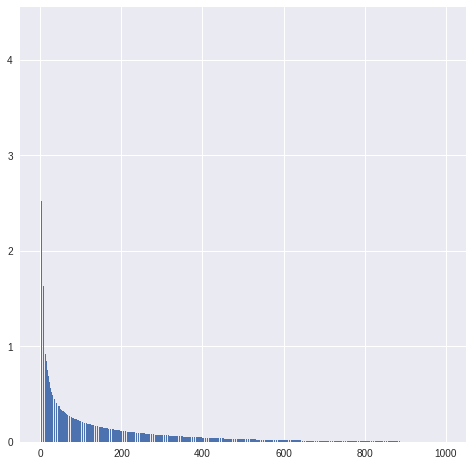

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(np.linspace(0,1000,1000),variances*100)

<BarContainer object of 10 artists>

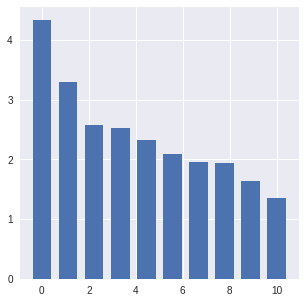

In [ ]:
# Zooming in

plt.figure(figsize=(5,5))
plt.bar(np.linspace(0,10,10),variances[0:10]*100)

It's legitimate to ask now... At what number of components 
we conserve much of the information? (var = $0.9$) 

In [ ]:
# Studying variance

percent = 0
threshold = 0.9
sum_variance = np.sum(variances)

for i in range(0, 1000):
    percent += variances[i]/sum_variance
    if percent > threshold:
        print('reach '+str(threshold)+' at '+str(i))
        break

reach 0.9 at 369


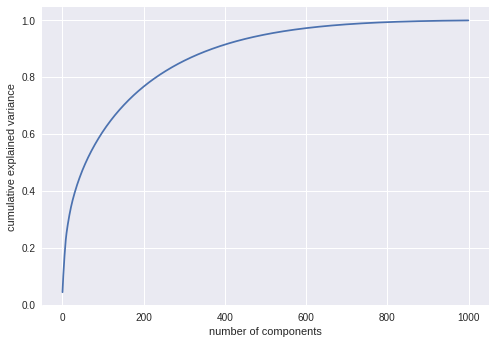

In [ ]:
plt.plot(np.cumsum(PCA_n.explained_variance_ratio_))  #cumulative sum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()




```
It seems reasonable to keep only the 0.9 of the variation, in order to neglect only a small part of the informations (variance)
```



In [ ]:
n_PC = 370 #around 369 -> conserving 0.9 of information
PCA_n = PCA(n_PC)
# PCA on annotated data
seq_PCA_Nat = PCA_n.fit_transform(seq_onehot_0)

*Plotting*

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, true labels, Natural sequences')

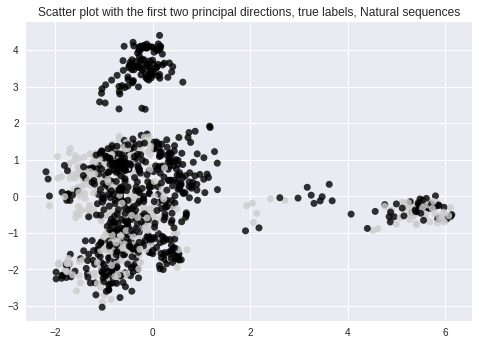

In [ ]:
plt.scatter(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1], c=labels_0, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 11))
plt.title("Scatter plot with the first two principal directions, true labels, Natural sequences")

-----

**Q: Are functional and non-functional sequences well sperarated in PCA space?**

The functional and not-functional sequences are **not** well separated in the PCA-space!
Except for a few regions of "space" where clusters of (non)functional sequences emerge.

-----

Text(0.5, 0.92, 'Scatter plot with the first three principal directions, Natural sequences')

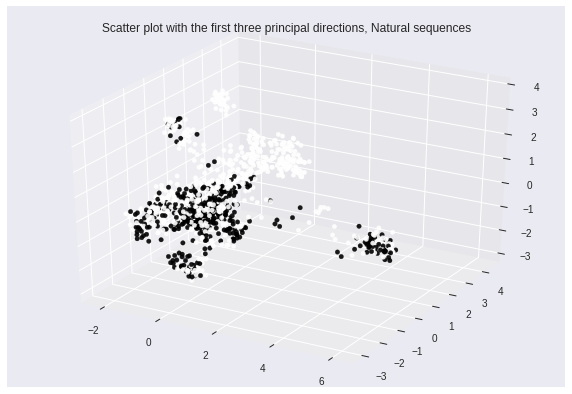

In [ ]:
from mpl_toolkits import mplot3d
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1],seq_PCA_Nat[:, 2], c=labels_0, alpha= 0.9)
plt.title("Scatter plot with the first three principal directions, Natural sequences")

This gives us an idea of the relationship between the features. Essentially, we have found the optimal stretch and rotation in 1920-dimensional space that allows us to see the nature of the sequence, **without reference** to the labels.

### **PCA on artificial sequences**

-----

Q: how many components should I conserve for the artificial data in order to get 0.9 of information?

In [ ]:
# Parameters
n_PC = 1000
PCA_n = PCA(n_PC) #I create a PCA retaining n_components

# PCA on annotated data
seq_PCA_ArtB = PCA_n.fit_transform(seq_onehot_1)

# We get the same matrix of before but with the features reduced to 1000 instead of 1920
len(seq_PCA_ArtB[:,0])

1003

In [ ]:
variances1=PCA_n.explained_variance_ratio_

print(len(variances))
print("the variance of the first component is: ", variances[999]*100) # we express in percent-scale
print("sum of all the variance of all the components is: ", sum(variances)) 
# it should sums up to something close to one, since we are retaining a large number of components

1000
the variance of the first component is:  0.0012070978688150083
sum of all the variance of all the components is:  0.9992310873465727


In [ ]:
# Studying variance

percent = 0
threshold = 0.9
sum_variance = np.sum(variances1)

for i in range(0, 1000):
    percent += variances1[i]/sum_variance
    if percent > threshold:
        print('reach '+str(threshold)+' at '+str(i))
        break

reach 0.9 at 198


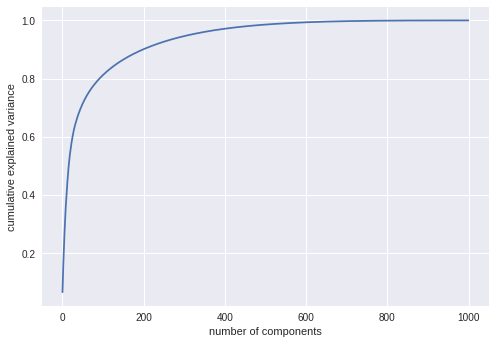

In [ ]:
plt.plot(np.cumsum(PCA_n.explained_variance_ratio_))  #cumulative sum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

-----

Now we apply PCA to our artificial sequences

In [ ]:
n_PC = 200 #around 198 -> conserving 0.9 of information
PCA_n = PCA(n_PC)
# PCA on annotated data
seq_PCA_Art = PCA_n.fit_transform(seq_onehot_1)

*Plotting*

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, artificial sequences')

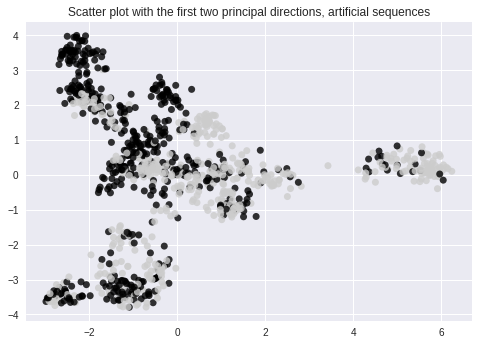

In [ ]:
plt.scatter(seq_PCA_Art[:, 0], seq_PCA_Art[:, 1], c=labels_1, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 11))
plt.title("Scatter plot with the first two principal directions, artificial sequences")

Text(0.5, 0.92, 'Scatter plot with the first three principal directions for artificial sequences')

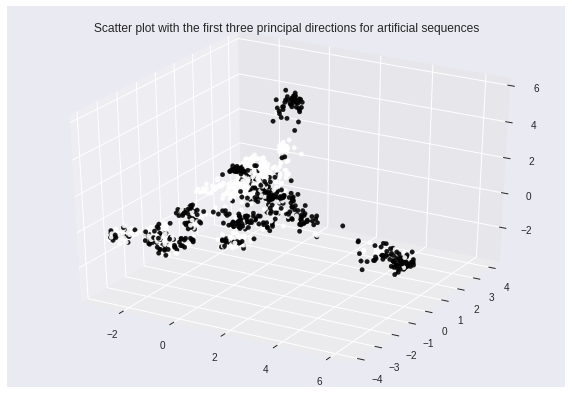

In [ ]:
from mpl_toolkits import mplot3d
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(seq_PCA_Art[:, 0], seq_PCA_Art[:, 1],seq_PCA_Art[:, 2], c=labels_1, alpha= 0.9)
plt.title("Scatter plot with the first three principal directions for artificial sequences")

### Comparing Natural vs Artificial sequences

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, true labels, Natural sequences')

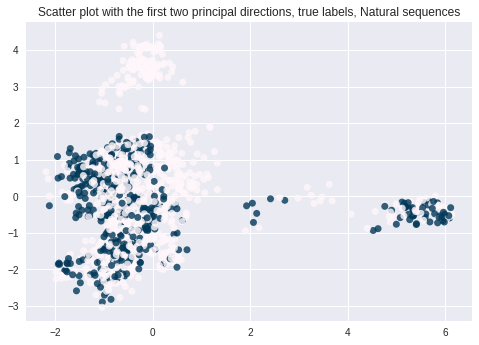

In [ ]:
plt.scatter(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1], c=labels_0, edgecolor='none', alpha=0.8,
            cmap='PuBu')
plt.title("Scatter plot with the first two principal directions, true labels, Natural sequences")

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, artificial sequences')

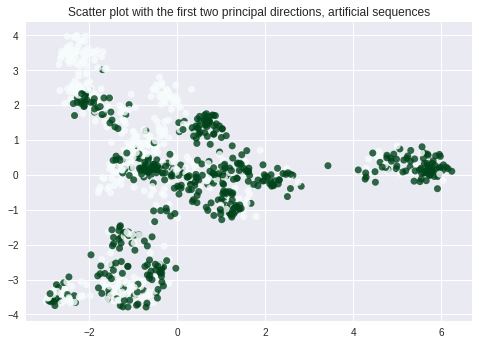

In [ ]:
plt.scatter(seq_PCA_Art[:, 0], seq_PCA_Art[:, 1], c=labels_1, edgecolor="none", alpha=0.8,
            cmap="BuGn")
plt.title("Scatter plot with the first two principal directions, artificial sequences")

**We notice that the samples are more concentred around (0,0) for the natural sequences while for the artificial sequences there's more spread.**

-----

**SUMMARY**

We have now the following PCA transformed sequences:

- **seq_PCA_Nat, seq_PCA_Art** 

----

## Task 3: Clustering sequence data




---

**Note well**

- From the visualization in the first to principal components it seems that the clustering procedure is not able capture any structure in our data.

- The disappoint results obtained with K-means highlight the known fact that clustering data in high-dimensions (our data are 1920-dimensional sparse vectors) can be very challenging.

-----

In [ ]:
# Importing
from pandas.core.groupby.groupby import T
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
def kmeans2D(dataset,nclusters):  
# Defining a function that do kmeans on a dataframe with a fixed number of clusters 
    
    est = KMeans(nclusters) # Class with kmeans action 
    est.fit(dataset) # Fitting the data in order to divide the data in nclusters
    y_kmeans = est.predict(dataset) # Predicting the clusters on the dataset, giving each point a cluster label

    cluster_centers=PCA(nclusters).fit_transform(est.cluster_centers_) #making PCA on the cluster centers predicted by kmeans in 1920 dimensions
 
    plt.scatter(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1], c=y_kmeans, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('nipy_spectral', 11))
    if nclusters>=3:
      plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=50, color="gold", edgecolor='black', linewidth=3); # Show the centres
    plt.title("Clusters plot with the first two principal directions")


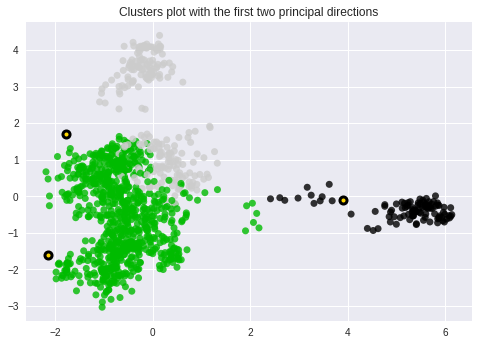

In [ ]:
# Testing with 3 clusters on the natural sequence
kmeans2D(seq_onehot_0,3)

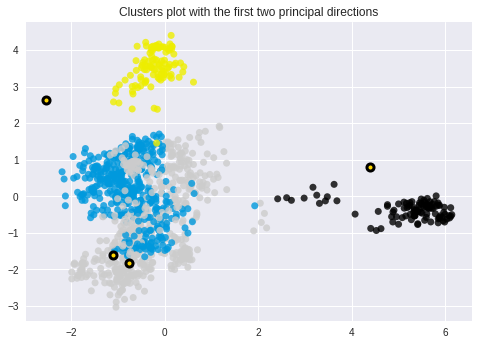

In [ ]:
# Testing with 4 clusters
kmeans2D(seq_onehot_0,4)


In [ ]:
# Same funcion of before but plotting in the first 3 important dimensions

def kmeans3D(dataset,nclusters): # Defining a function that do kmeans on a dataframe with a fixed number of clusters

  est = KMeans(nclusters) # Class with kmeans action 
  est.fit(dataset) # Fitting the data in order to divide the data in nclusters
  y_kmeans = est.predict(dataset) # Predicting the clusters on the dataset, giving each point a cluster label

  cluster_centers=PCA(nclusters).fit_transform(est.cluster_centers_) #transforming the centers form 1920-d to nclusters-d

  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")

  ax.scatter3D(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1],seq_PCA_Nat[:, 2], c=y_kmeans, alpha= 0.9)
  if nclusters>=3: # in 3D there's no way to show the centers if nclusters is =2 because PCA for the centers allows them to be only view in 2D
    ax.scatter3D(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],s=50, color="gold", edgecolor='black', linewidth=3); # Show the centres
  plt.title("Clusters plot with the first three principal directions")

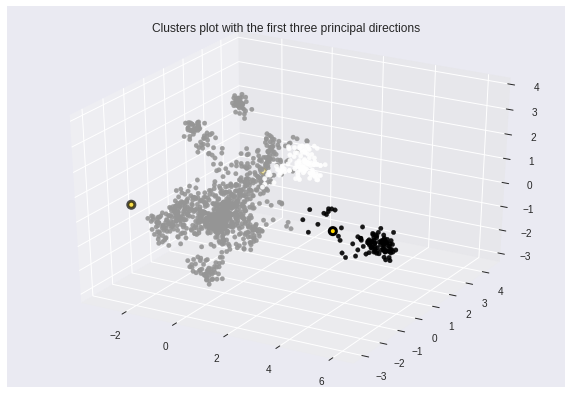

In [ ]:
#testing with 3 clusters
kmeans3D(seq_onehot_0,3)

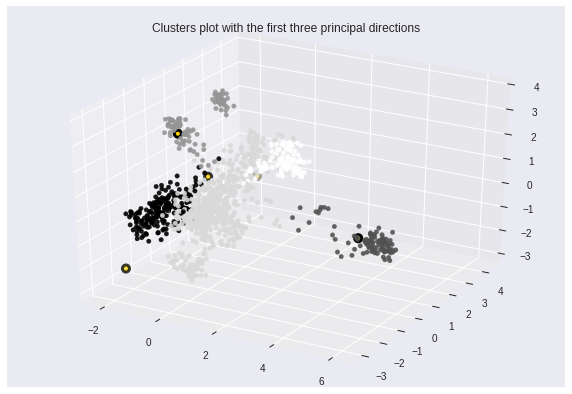

In [ ]:
kmeans3D(seq_onehot_0,5)

As we can see, the centers don' t look exactly as they were the correct ones for the clusters, both in 2D and in 3D. This is caused by the fact that the KMeans has worked in a huge larger space of 1920 dimensions, and then has been reduced by PCA and showed only in the first 2/3 dimensions. Same for the clusters: they don't look perfectly separeted in low dimensions but, if we had a way to visualize way in d>>3, we would observe a much better clusters separation.


Let's try now to compare the separation into 2 clusters with respect to the labels that should separate their funcionality in 1920 dimensions:

###2D visualization

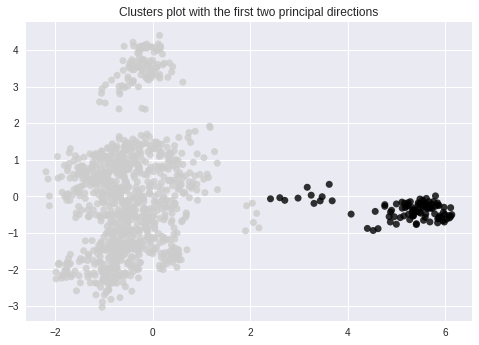

In [ ]:
kmeans2D(seq_onehot_0,2)
#clusters labels 2D

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, true labels')

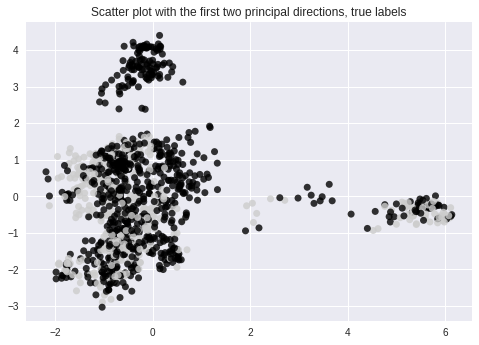

In [ ]:
plt.scatter(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1], c=labels_0, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 11))
plt.title("Scatter plot with the first two principal directions, true labels") #true labels 2D

###3D visualization

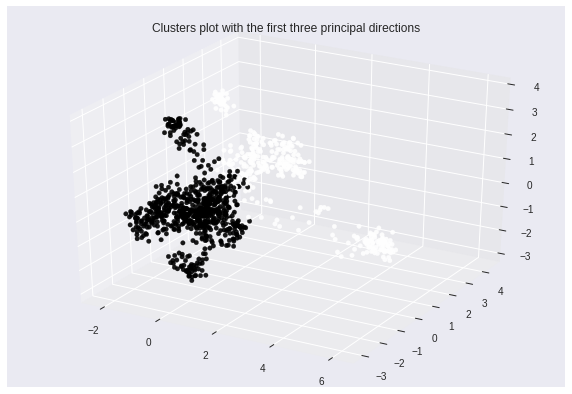

In [ ]:
kmeans3D(seq_onehot_0,2)
 #cluster labels visualization 3D

Text(0.5, 0.92, 'Scatter plot with the first three principal directions, true labels')

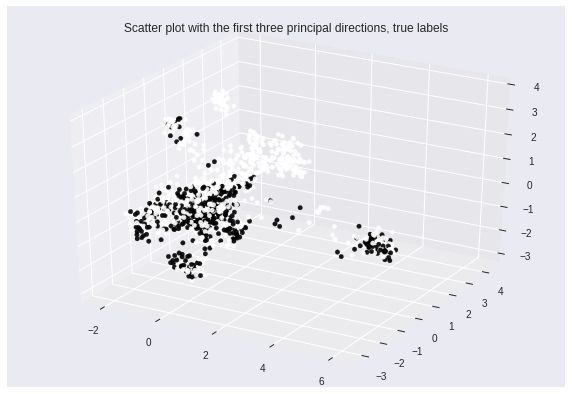

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1],seq_PCA_Nat[:, 2], c=labels_0, alpha= 0.9)
plt.title("Scatter plot with the first three principal directions, true labels")  
 #true labels visualization 3D

As we can see, the data don't seem in general to respect and follow the labels with two clusters, indeed still there is a lot of error and mismatch mostly in the zones in which the dataset is denser, so for values of the features that tend to the origin. As a result, functional and non functional sequences are not so perfectly separated into different clusters, but most of the error is caused by the confusion of the features where the number of points is highly populated.

In [ ]:
# Unification of the two datasets

seq_onehot_tot=np.concatenate((seq_onehot_0,seq_onehot_1),axis=0,out=None) #this creates a 2004x1920 matrix with all 
                                                                           #the natural and artificial proteins
print(seq_onehot_tot.shape) #shape check

(2133, 1920)


Let us try now to apply the cluster algorithms, both in 2D and 3D on the total dataframe of natural and artificial proteins. What we expect now is that, using nclusters=2 the separation should be given in terms of the natural and the different artificial class.
Before doing that, one needs to do PCA on the total unified dataframe:

2133
reach 0.9 at 356


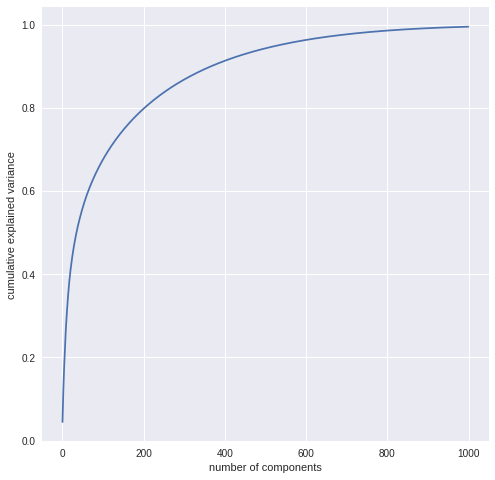

In [ ]:
# Parameters
n_PC = 1000
PCA_n = PCA(n_PC) #I create a PCA retaining n_components
# PCA on annotated data
seq_PCA_tot = PCA_n.fit_transform(seq_onehot_tot)

# We get the same matrix of before but with the features reduced to 1000 instead of 1920
print(len(seq_PCA_tot[:,0]))
variances=PCA_n.explained_variance_ratio_

plt.figure(figsize=(8,8))

percent = 0
threshold = 0.9
sum_variance = np.sum(variances)

for i in range(0, 1000):
    percent += variances[i]/sum_variance
    if percent > threshold:
        print('reach '+str(threshold)+' at '+str(i))
        break

plt.plot(np.cumsum(PCA_n.explained_variance_ratio_))  #cumulative sum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

The number of components necessary in order to take 90% of the information is 356, so we take 360 for simplicity, and we do PCA on the total dataset with this number of components, instead of taking 1920 of them.

In [ ]:
n_PC = 360
PCA_n = PCA(n_PC)

seq_PCA_tot = PCA_n.fit_transform(seq_onehot_tot)

Let's plot this now, separating the artificial data from the natural ones

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, true labels')

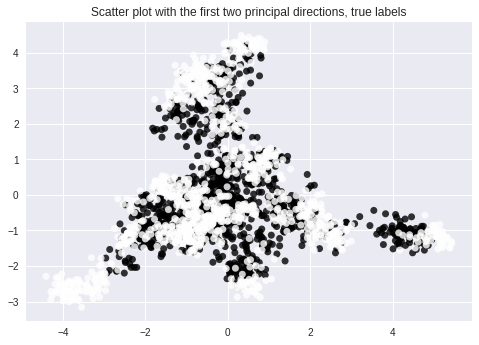

In [ ]:
import matplotlib

col=np.concatenate((np.zeros(1130),np.ones(1003)),axis=0,out=None).tolist() #a list that associate to the labels 2 colors wheter 
                                                                              #the points are natural or artificial

colors=['black','white'] #I'm choosing white and black because the only two that can be seen
plt.scatter(seq_PCA_tot[:, 0], seq_PCA_tot[:, 1], c=col, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Scatter plot with the first two principal directions, true labels")

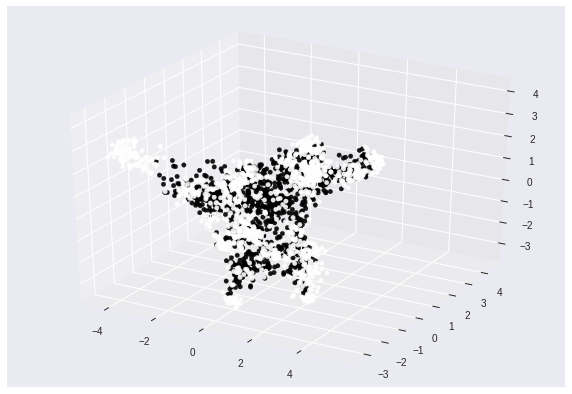

In [ ]:
# Showing them in 3D withour having done cluster algorithm yet

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(seq_PCA_tot[:, 0], seq_PCA_tot[:, 1],seq_PCA_tot[:, 2], c=col, alpha= 0.9,cmap=matplotlib.colors.ListedColormap(colors))



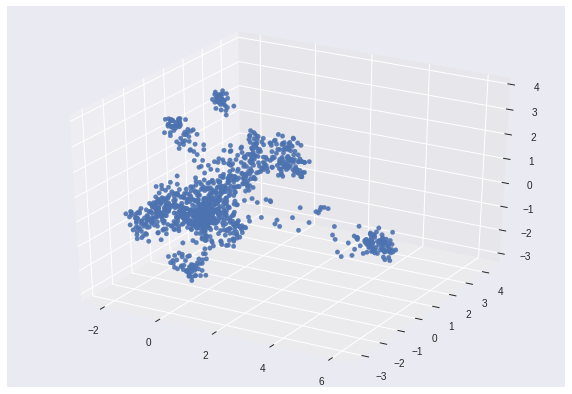

In [ ]:
# We can do 2 different plots to show that the artificial points and natural ones are different

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(seq_PCA_Nat[:, 0], seq_PCA_Nat[:, 1],seq_PCA_Nat[:, 2],alpha=0.9)



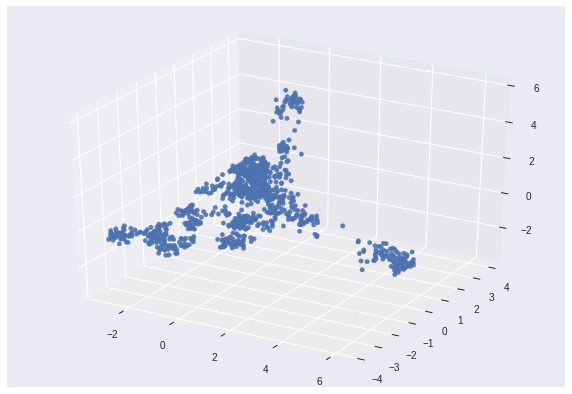

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(seq_PCA_Art[:, 0], seq_PCA_Art[:, 1],seq_PCA_Art[:, 2],alpha=0.9)

Now let's do Kmeans to see how our algorithm is instead predicting the separation into 2 clusters. We would like to see that the clustering algorithm separates the sets of points as indicated by the natural and artifical proteins:

In [ ]:
def kmeans2D_tot(dataset,nclusters): # Defining a function that do kmeans on a dataframe with a fixed number of clusters
    
    est = KMeans(nclusters) # Class with kmeans action 
    est.fit(dataset) # Fitting the data in order to divide the data in nclusters
    y_kmeans = est.predict(dataset) # Predicting the clusters on the dataset, giving each point a cluster label

    cluster_centers=PCA(nclusters).fit_transform(est.cluster_centers_) #making PCA on the cluster centers predicted by kmeans in 1920 dimensions

    plt.scatter(seq_PCA_tot[:, 0], seq_PCA_tot[:, 1], c=y_kmeans, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('nipy_spectral', 11))
    if nclusters>=3:
      plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=50, color="gold", edgecolor='black', linewidth=3); # Show the centres
    plt.title("Clusters plot with the first two principal directions")

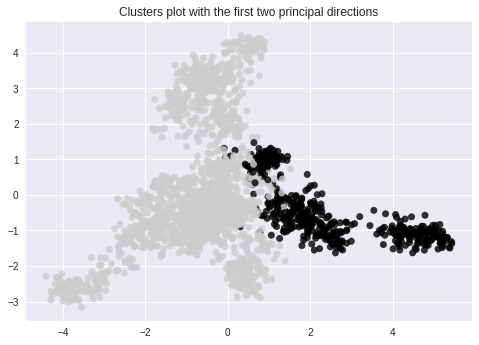

In [ ]:
kmeans2D_tot(seq_onehot_tot,2)

Whereas the real separation between natural and artifical states:

Text(0.5, 1.0, 'Scatter plot with the first two principal directions, true labels')

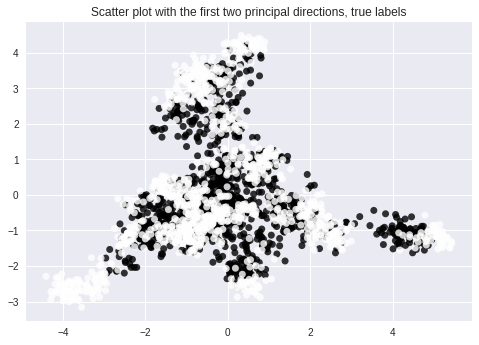

In [ ]:
col=np.concatenate((np.zeros(1130),np.ones(1003)),axis=0,out=None).tolist() #a list that associate to the labels 2 colors wheter 
                                                                              #the points are natural or artificial

colors=['black','white'] #I'm choosing white and grey because the only two that can be seen
plt.scatter(seq_PCA_tot[:, 0], seq_PCA_tot[:, 1], c=col, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Scatter plot with the first two principal directions, true labels")

In a 3D visualization, clustering states:

In [ ]:
def kmeans3D_tot(dataset,nclusters): # Defining a function that do kmeans on a dataframe with a fixed number of clusters

  est = KMeans(nclusters) # Class with kmeans action 
  est.fit(dataset) # Fitting the data in order to divide the data in nclusters
  y_kmeans = est.predict(dataset) # Predicting the clusters on the dataset, giving each point a cluster label

  cluster_centers=PCA(nclusters).fit_transform(est.cluster_centers_) #transforming the centers form 1920-d to nclusters-d

  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")

  ax.scatter3D(seq_PCA_tot[:, 0], seq_PCA_tot[:, 1],seq_PCA_tot[:, 2], c=y_kmeans, alpha= 0.9)
  if nclusters>=3: # in 3D there's no way to show the centers if nclusters is =2 because PCA for the centers allows them to be only view in 2D
    ax.scatter3D(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],s=50, color="gold", edgecolor='black', linewidth=3); # Show the centres
  plt.title("Clusters plot with the first three principal directions")

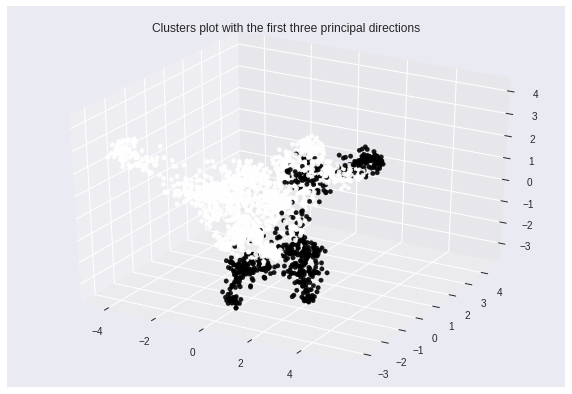

In [ ]:
kmeans3D_tot(seq_onehot_tot,2)

Whereas the true separation states:

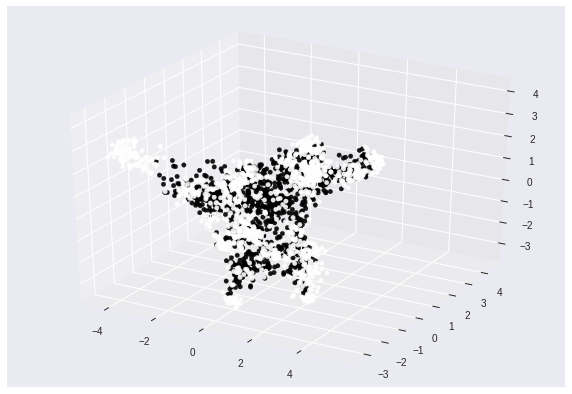

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(seq_PCA_tot[:, 0], seq_PCA_tot[:, 1],seq_PCA_tot[:, 2], c=col, alpha= 0.9,cmap=matplotlib.colors.ListedColormap(colors))

Kmeans doesn' t look able, even if the clustering was done in 1920 dimensions, to separate in those 2 clusters the 2 labels that we have for our dataframe (nat,art). This probably means that the artificial constructed proteins are almost identical, in terms of good protein features, to the natural ones!

## Task 4: Predicting protein functionality

*Use a classifier of your choice (e.g. logistic regression, but you could use random forest, neural networks etc.) to learn a function mapping sequences to functionality, i.e. to a binary output, using the training MSA of natural sequences. Test this classifier using the artificial test data, too. Determine the numbers of predictions which are true positives (TP – functional sequences predicted to be functional), false postives (FP – nonfunctional sequences predicted to be functional), true negatives (TN – nonfunctional sequences predicted to be nonfunctional) and false negatives (FN – functional sequences predicted to be nonfunctional). Compare them for training and test data. Note that for logistic regression, as for any soft classifier, these quantities are functions of a cutoff used to achieve a hard classification.*

**Data we will be using:**

In [ ]:
# Matrix of data NATURAL
# Data
print("NATURAL DATA + LABELS \n\n")
data_nat = seq_onehot_0
print("Our dataset matrix is: \n", data_nat)
# Labels
labels_nat = labels_0
print("And our labels...: \n", labels_nat)

# Matrix of data ARTIFICIAL
# Data
print("\n\n ARTIFICIAL DATA + LABELS \n\n")
data_art = seq_onehot_1
print("Our dataset matrix is: \n", data_art)
# Labels
labels_art = labels_1
print("And our labels...: \n", labels_art)

NATURAL DATA + LABELS 


Our dataset matrix is: 
 [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
And our labels...: 
 [True, False, False, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, True, False, False, True, True, False, True, False, True, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, False, True, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, True, True, True, True, True, False, False, True

### **Logistic Regression** (Core Method)

**Natural Sequences**

In [ ]:
# Importing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
logistic = LogisticRegression(max_iter=250)

# Splitting
# using 80% of the data to train, 20% to validate
x_train, x_test, y_train, y_test = train_test_split(data_nat, labels_nat, test_size=0.2, random_state=None)

# logistic regression fitting
logistic.fit(x_train, y_train)

# evaluating performance on train and set
score = logistic.score(x_train, y_train)
print(str(int(score*100))+'% NatA score train')

score = logistic.score(x_test, y_test)
print(str(int(score*100))+'% NatA score test')

100% NatA score train
80% NatA score test


**Confusion Matrix:**


Let's train a model on the training data and see how the confusion matrix looks like on the test set.

The confusion matrix goes beyond telling us the score of the model. Looking at it we can see how many false-negative/false positive we have:

[[129  23]
 [ 20  54]]


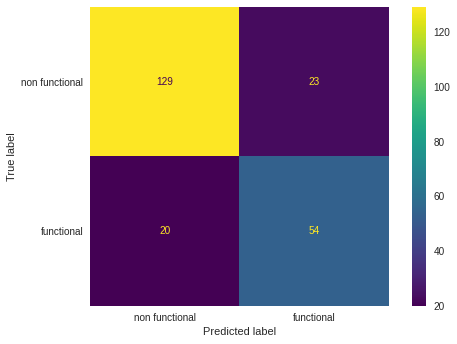

In [ ]:
# Importing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


y_pred = logistic.predict(x_test) #making prediction on test (hard classification)
prob = logistic.predict_proba(x_test) #soft classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)                                                  
disp = ConfusionMatrixDisplay(cm, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

In [ ]:
# understanding the structure of cm
print("the probability to have for the first sequence the label false is: ", prob[0,0])
print("the probability to have for the first sequence the label true is: ", prob[0,1])
print("in fact we can see that our model predit for the first sequence the label: ", y_pred[0])

the probability to have for the first sequence the label false is:  0.9962135828656866
the probability to have for the first sequence the label true is:  0.0037864171343134165
in fact we can see that our model predit for the first sequence the label:  False


The model has a good performace
- 60 errors on 226 predictions!

But there is an issue. 
There are 35 proteins that are classified as functional even though they are not.

The logistic regression can work both as an hard or as a soft classifier. The default version that we used is an hard classifier that simply gives the label of the class with the highest probability. 

$$True \text{ if }P(True)>0.5$$

If we are keen on not wanting to tell that non functional protein are functional we can raise the threshold  

$$True \text{ if }P(True)>T$$

This, in principle, reduces the number of false protein predicted as positive at the cost of increasing the number of false predicted true protein. 

But... pay heet!!!
If we are not carefull with our choiche we can lose the predictive capabilities of our algorithm!

Fortunately we can check the behavior of the predictive capacity  on the validation set for different values of $T$.


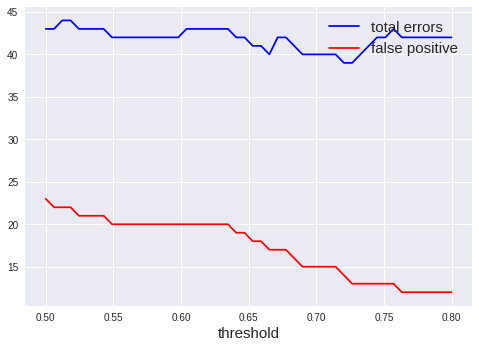

In [ ]:
total_error = np.zeros(0)
false_positive = np.zeros(0)
threshold = np.linspace(0.5,0.8,50)

for thr in threshold: #this for loop creates a new y_treshold to compare with y_test, where y_th now has ones only if the prob
                      #to actually be 1 for the protein is > th, instead of before in which th=0.5. This is tried for many different ths
  y_treshold=np.copy(y_pred)
  for i in range(len(y_treshold)):
    if prob[i,1]>=thr: #the second element is the prob to be True
      y_treshold[i]=True
    else:
      y_treshold[i]=False
  cm = confusion_matrix(y_test, y_treshold)
  total_error = np.append(total_error,cm[0,1]+cm[1,0]) #the antidiagonal terms of cm are the errors ones, that have to be summed
  false_positive = np.append(false_positive, cm[0,1])

plt.plot(threshold,total_error, c='blue', label='total errors')
plt.plot(threshold, false_positive, c='red',label='false positive')
plt.xlabel('threshold', fontsize=15)
plt.legend(loc="upper right", fontsize=15)

# this proves that the algo is taking into consideration:
# - false as a first label 
# - true as a second label

Now let's try to plot the new **confusion matrix** using an higher treshold

[[137  15]
 [ 25  49]]


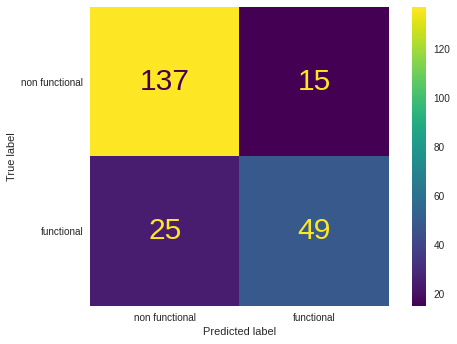

In [ ]:
y_treshold=np.copy(y_pred)
for i in range(len(y_treshold)):
    if prob[i,1]>=0.70: #the best one to have a total error not too high but lowering the false positive error
      y_treshold[i]=True
    else:
      y_treshold[i]=False
cm = confusion_matrix(y_test, y_treshold)

# Confusion Matrix
cm = confusion_matrix(y_test, y_treshold)
print(cm)                                                  
disp = ConfusionMatrixDisplay(cm, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

It appears how the model is improved in the prediction of the prediction of false positive. The drawback is a reduced number of true positive predicted. 

This example clearly shows that **it is essential to have a certain degree of understanding of the model that we are using!**

----

Dependence of performance on variability of the random state

In [ ]:
# how does the performance depend on the variability of the random state?

score = []
for i in range(100):
    # using 80% of the data to train, 20% to validate, where vairability comes from
    logistic = LogisticRegression(max_iter=250, random_state=None)
    x_train, x_test, y_train, y_test = train_test_split(data_nat, labels_nat, test_size=0.2, random_state=None)

    # logistic regression
    logistic.fit(x_train, y_train)

    # evaluating performance
    score.append(logistic.score(x_test, y_test))

In [ ]:
score = np.array(score)
print("the standard deviation of the performance is: ", np.std(score)*100)
print("the mean value of the performance is: ", np.mean(score)*100)

the standard deviation of the performance is:  2.30523754409415
the mean value of the performance is:  78.65486725663716


Validation

We want now to see how good the model perform under k-cross validation, since we already checked the score (on average) on the test set. We will split the dataset into k subsets to see many possible train-validation combinations

*2-fold cross validation*

In [ ]:
X1, X2, y1, y2 = train_test_split(data_nat, labels_nat, test_size=0.5, random_state=1111)
X1.shape, X2.shape #I esxpect the set to be divided into two equal parts

((565, 1920), (565, 1920))

In [ ]:
print(logistic.fit(X2, y2).score(X1, y1))
print(logistic.fit(X1, y1).score(X2, y2))

0.7557522123893805
0.7628318584070797


Having trained with less data, the model has smaller score than having used a classic train-test split. Let's try now to do a generic K-cross validation:

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logistic, data_nat, labels_nat, cv=10) #We' re splitting our set into
avg=0                                                        #10 sets, each one used as validation 
                                                        #each different time  
print(cv)
for scores in cv:
  avg+=scores/10
avg


[0.5840708  0.60176991 0.75221239 0.53982301 0.43362832 0.50442478
 0.27433628 0.6460177  0.75221239 0.69026549]


0.5778761061946903

So the model accuracy actually decreased with the k-cross validation.

-----

**Artificial Sequences**

It's interesting now to see how now model predicts the **functionality** of proteins for **artificial sequences**.

----

Using the model trained before:

In [ ]:
# do we have the same performance on artificial data?
score = logistic.score(data_art, labels_art)
print(str(int(score*100))+'% Art score')

76% Art score


[[403 101]
 [136 363]]


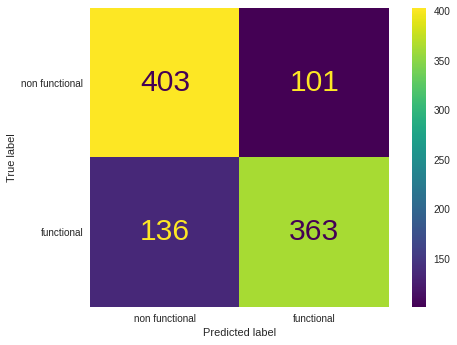

In [ ]:
y_pred = logistic.predict(data_art) #making prediction on test
prob = logistic.predict_proba(data_art)

# Confusion Matrix
cm = confusion_matrix(labels_art, y_pred)
print(cm)                                                  
disp = ConfusionMatrixDisplay(cm, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

----

**Comparing the two:**

The model has a good accuracy on the artificial data. This means that, actually, the artificial data has a structure similar to the natural one, since the accuracy of the model on artificial data is comparable to the one for test set of natural data.

-----

**Retraining the model:**

 - training: natural 
 - test: artificial

Let's now try to train the model using all the natural data as training set and all the artificial sequences as test set.

In [ ]:
logistic = LogisticRegression(max_iter=250)

# Splitting
# using 80% of the data to train, 20% to validate
x_train, x_test, y_train, y_test = data_nat, data_art, labels_nat, labels_art

# logistic regression fitting
logistic.fit(x_train, y_train)

# evaluating performance on train and set
score = logistic.score(x_train, y_train)
print(str(int(score*100))+'% score train')

score = logistic.score(x_test, y_test)
print(str(int(score*100))+'% score test')

99% score train
78% score test


[[415  89]
 [128 371]]


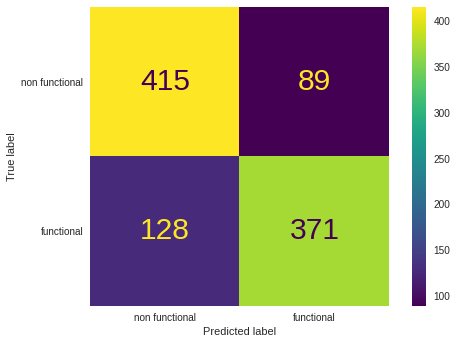

In [ ]:
y_pred = logistic.predict(x_test) #making prediction on test
prob = logistic.predict_proba(x_test)

# Confusion Matrix
cm = confusion_matrix(labels_art, y_pred)
print(cm)                                                  
disp = ConfusionMatrixDisplay(cm, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

---------

*Experimenting*

*test*: Train the model with all the artificial data (almost) and test it on the natural data. 

In [ ]:
# (unconventional) try to raise the trainset using all the artificials and test on naturals
x_train, x_test, y_train, y_test = train_test_split(data_art, labels_art, test_size=0.001, random_state=None)
logistic.fit(x_train, y_train)
score = logistic.score(data_nat, labels_nat)
print(str(int(score*100))+'% Art (training on all artificial)')

#no significative changes has been obtained, this could be due to the similarity of the two structures

67% Art (training on all artificial)


It's evident that it's not the case viceversa.
**If we train the model on the art data and we test with nat data we obtain bad performance(accuracy)**

---------

###Ensembling (Random Forrest and AdaBoost) (Focus)

Ensembling strategies are ways to combine a certain number of weak classifier in to a strong classifier.

**What is a weak classifier?** A classifier whose prediction are *weakly* correlated to the real label (still it must perform better than random guessing otherwise there is nothing to learn from it!). Usually weak classifiers are simple and fast.

**What is a strong classifier?** A good classifier. 

There are two types of Ensembling strategies:

**Parallel** : the weak classifiers can be trained in parallel and are independent from each other. (example Bagging)

**Sequential** : the weak classifiers are trained one after the other in a sequence. Each one makes use of the predictions of the previous ones. (Example Boosting)

In ensemble learning theory, we call weak learners (or base models) models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias (low degree of freedom models, for example) or because they have too much variance to be robust (high degree of freedom models, for example). Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.

-----

One important point is that our choice of weak learners should be coherent with the way we aggregate these models. If we choose base models with low bias but high variance, it should be with an aggregating method that tends to reduce variance whereas if we choose base models with low variance but high bias, it should be with an aggregating method that tends to reduce bias.
This brings us to the question of how to combine these models. We can mention three major kinds of meta-algorithms that aims at combining weak learners:

- **bagging**, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process
- **boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy
- **stacking**, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions


*Very roughly, we can say that bagging will mainly focus at getting an ensemble model with less variance than its components whereas boosting and stacking will mainly try to produce strong models less biased than their components (even if variance can also be reduced).*

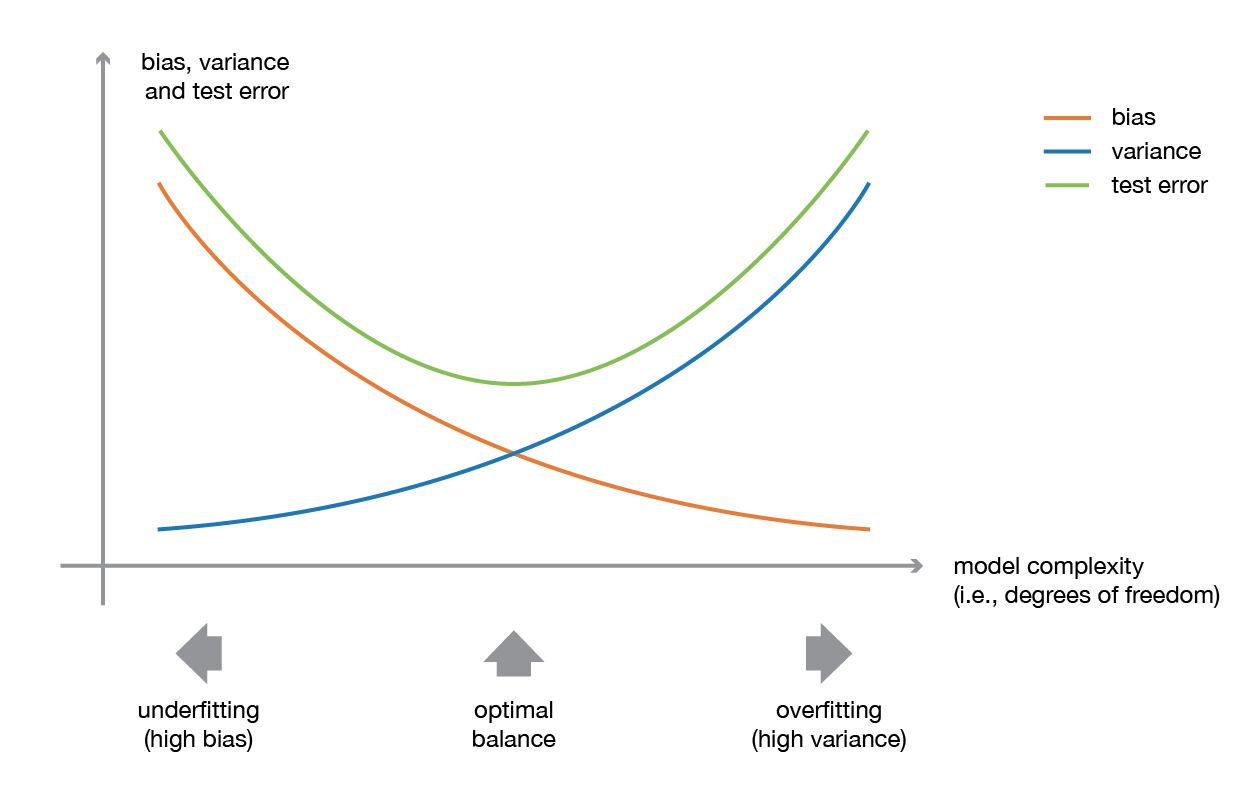




#### **Random Forrest**

Bagging is really simple:

Suppose we have $N$ data points and a weak classifier. We build $M$ datasets drawing (**with replacement**) for each one of them $n$ points from the original sample. Each of these new $M$ samples (*bags*) will contain some repeted points of the original dataset and not contain some of them.

On all $M$ samples we train the weak classifier and when we have to do a prediction we just do a majority vote.

Why it works?

The idea is to use high variance (*unstable*) classifiers that are higly sensitive to variation in the training data. The bagging techniques is a way to have slightly different training sets (that still somehow mimic the variation that could exist between different real datasets). The high variance weak classifier prediction will be very different depending on the bag it has been training on and he final majority vote *should* cancel out the high variance


The weak classifier that we will use is the **DecisionTree**. The strong classifier built on it with bagging is called **RandomForest**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.spatial import distance
from sklearn.tree import DecisionTreeClassifier

# splitting
x_train, x_test, y_train, y_test = train_test_split(data_nat, labels_nat, test_size=0.2, random_state=None)

# parameters
n_estimators = 30

randforest = RandomForestClassifier(n_estimators = n_estimators, random_state = 1999)
randforest.fit(x_train, y_train)
score = randforest.score(x_test, y_test)
print(score*100)

78.31858407079646


-----

**Q:** What's the **optimal number of number of estimators**?

In [ ]:
# run it if you want but IT TAKES A LOT OF TIME
# optimal number of estimators (fix state, fix test and train, vary n_estimators)
scoretr = []
scorete = []
iterations = 200
for i in range(1,iterations):
    n_estimators = i

    randforest = RandomForestClassifier(n_estimators = n_estimators, random_state = 1999)
    randforest.fit(x_train, y_train)
    scoretr.append(randforest.score(x_train, y_train))
    scorete.append(randforest.score(x_test, y_test))
    
# optimal number is 30

KeyboardInterrupt: ignored

ValueError: ignored

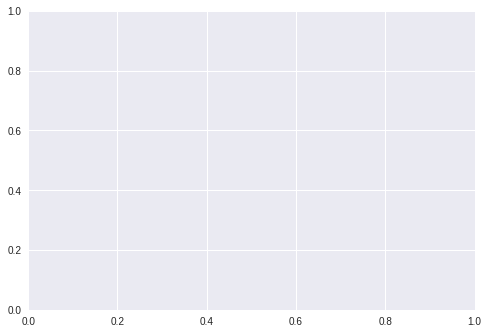

In [ ]:
# plotting the result

fig, ax = plt.subplots(1)
ax.plot(np.arange(1,iterations,1),scoretr, '*', label='train', color='k')
ax.plot(np.arange(1,iterations,1),scorete,'*', label='test', color='red')
ax.axvline(x=30, ymin=0, ymax=1, color='green', label='optimal n_estimators')
ax.legend()
plt.title("performance vs number of iterations")
plt.show()

---- 

**Building our classifier**

- Let's play with our **weak classifier**. The main parameter of a tree is its maximum depth:

In [ ]:
# splitting
#x_train, x_test, y_train, y_test = train_test_split(data_nat, labels_nat, test_size=0.2, random_state=None)
x_train, x_test, y_train, y_test = train_test_split(seq_PCA_NatA, labels_nat, test_size=0.2, random_state=None)

# In order to plot the scatter plot I trasform
labels_00 = np.copy(y_train)
labels_11 = np.copy(y_test)
for i in range(len(labels_00)):
  if labels_0[i] == str('true'):
    labels_00[i] = 1
  elif labels_0[i] == str('false'): 
    labels_00[i] = 0

for i in range(len(labels_11)):
  if labels_1[i] == str('true'):
    labels_11[i] = 1
  elif labels_1[i] == str('false'): 
    labels_11[i] = 0

# fit the single decision tree
def fit_randomized_tree(depth=0):
    
    #model
    model = DecisionTreeClassifier(max_depth=depth, random_state=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    
    #in order to plot the scatter plot I trasform
    for i in range(len(y_pred)):
      if y_pred[i] == str('true'):
        y_pred[i] = 1
      else:
        y_pred[i] = 0

    
    #plotting
    plt.figure(figsize=(6,7))    
    plt.scatter(x_test[:, 0], x_test[:, 1], s=70, c=y_pred, cmap='rainbow');
    

from ipywidgets import interact
interact(fit_randomized_tree, depth=(1, 15));       

interactive(children=(IntSlider(value=1, description='depth', max=15, min=1), Output()), _dom_classes=('widget…

Now we will learn 4 DecisionTree on 4 different bags and see if we have the required variance:

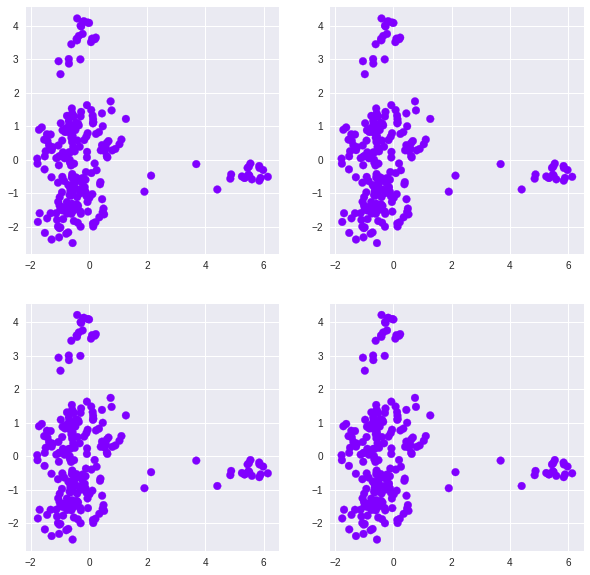

In [ ]:
model_l = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(0,len(x_train[:,0]))  # bag 1
model_l.fit(x_train[0:idx], y_train[0:idx])
y_hat_l = model_l.predict(x_test) 

model_m = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(0,len(x_train[:,0]))  # bag 2
model_m.fit(x_train[0:idx], y_train[0:idx])
y_hat_m = model_m.predict(x_test)      

model_c = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(0,len(x_train[:,0]))  # bag 3
model_c.fit(x_train[0:idx], y_train[0:idx])
y_hat_c = model_c.predict(x_test)       

model_g = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(0,len(x_train[:,0]))  # bag 4
model_g.fit(x_train[0:idx], y_train[0:idx])
y_hat_g = model_g.predict(x_test)      


for i in range(len(y_hat_l)):
  if y_hat_l[i] == str('true'):
    y_hat_l[i] = 1
  else:
    y_hat_l[i] = 0

for i in range(len(y_hat_m)):
  if y_hat_m[i] == str('true'):
    y_hat_m[i] = 1
  else:
    y_hat_m[i] = 0

for i in range(len(y_hat_c)):
  if y_hat_c[i] == str('true'):
    y_hat_c[i] = 1
  else:
    y_hat_c[i] = 0

for i in range(len(y_hat_g)):
  if y_hat_g[i] == str('true'):
    y_hat_g[i] = 1
  else:
    y_hat_g[i] = 0

# Plotting
fig, ax  = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_hat_l, cmap='rainbow')

ax[0,1].scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_hat_m, cmap='rainbow')

ax[1,0].scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_hat_c, cmap='rainbow')

ax[1,1].scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_hat_g, cmap='rainbow')

Indeed, we have an high variance.

- Let's build the **Strong classifier**:

The RandomForest classifier is just the majority vote between the 4 models:


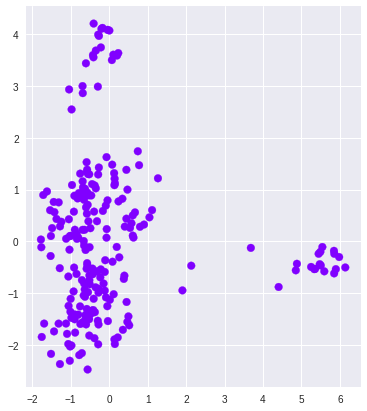

test score =  0.5707964601769911


In [ ]:
model_l = RandomForestClassifier(n_estimators=4, max_depth=15 ,random_state=3)
model_l.fit(x_train, y_train)
y_hat = model_l.predict(x_test) 

for i in range(len(y_hat)):
  if y_hat[i] == str('true'):
    y_hat[i] = 1
  else:
    y_hat[i] = 0


plt.figure(figsize=(6,7))                                     
plt.scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_hat, cmap='rainbow');
plt.show()

print('test score = ',model_l.score(x_test,y_test))


----

**Artificial Sequences:**

Let's try now the model on our artificial sequences to predict their functionality.

In [ ]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(data_nat, labels_nat, test_size=0.1, random_state=None)

# parameters
n_estimators = 30

randforest = RandomForestClassifier(n_estimators = n_estimators, random_state = 1999)
randforest.fit(x_train, y_train)
y_pred = randforest.predict(data_art)
score = randforest.score(data_art, labels_art)
print(score*100)

77.96610169491525


[[425  79]
 [142 357]]


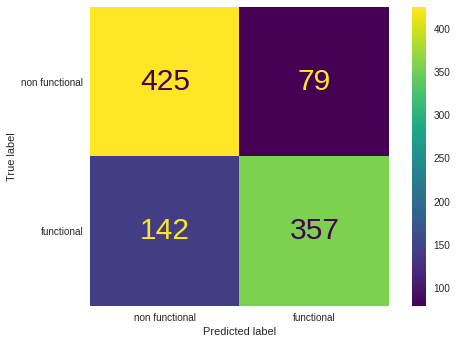

In [ ]:
# Confusion Matrix
cm = confusion_matrix(labels_art, y_pred)
print(cm)                                                  
disp = ConfusionMatrixDisplay(cm, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

------

#### **AdaBooster**

In sequential methods the different combined weak models are no longer fitted independently from each others. The idea is to fit models iteratively such that the training of model at a given step depends on the models fitted at the previous steps. “Boosting” is the most famous of these approaches and it produces an ensemble model that is in general less biased than the weak learners that compose it.

**Boosting** works building a sequence of classificator models. Each model of this sequence is trying to fix the prediction errors of the previous one. Also each model has an associated score.

At the end we will have a sequence of classifiers, each one of them specialized on the failures of the previous one and the procedure ends doing the final prediction with a 'weighted voting' using the model scores to weigh the single models vote.

It may seems complicated but it is really simple, the procedure is more clear if we look at the AdaBoost algorithm:

The final prediction is:

$$H(x)=sign\bigg(\sum_i \alpha_i h_i(x)\bigg)$$

Where $\alpha_i$ is the importance of the $i^{th}$ weak classifier and $h(x)$ is its prediction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

weak_classifier = DecisionTreeClassifier(max_depth=1,random_state=5)                            # here we define the weak classifier                
strong_classifier = AdaBoostClassifier(n_estimators = 50, base_estimator = weak_classifier)     # here we build the strong classifier

X_train, X_test, y_train, y_test = train_test_split(data_nat, labels_nat, random_state=314,test_size=0.2)  

model = strong_classifier.fit(X_train, y_train)


In [ ]:
model.score(X_test,y_test)

0.7699115044247787

### **K-nn classifier** (extra)

Let's try to use another classifier, the **K-nn** just to compare the performance. 

In [ ]:
from sklearn import neighbors, datasets

x_train, x_test, y_train, y_test = train_test_split(data_nat, labels_nat, test_size=0.2, random_state=None)

#create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=20)        # K=10
#fit the model
knn.fit(x_train, y_train)
#do the prediction on the 'X_test' vectors
y_pred=knn.predict(x_test)

print('Train score  = ',knn.score(x_train,y_train))      
print('Test score   = ',knn.score(x_test,y_test))

Train score  =  0.7853982300884956
Test score   =  0.7168141592920354


Trying after PCA, since it may suffer of the curse of dimensionality problem, given the high dimensionality of our data set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(seq_PCA_Nat, labels_nat, test_size=0.2, random_state=None)

#create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=20)      
#fit the model
knn.fit(x_train, y_train)
#do the prediction on the 'X_test' vectors
y_pred=knn.predict(x_test)

print('Train score  = ',knn.score(x_train,y_train))      
print('Test score   = ',knn.score(x_test,y_test))

# NO BIG DIFFERENCE

Train score  =  0.786504424778761
Test score   =  0.7345132743362832


## Task 5: Generating artificial sequences (WIP)


Task 5: Generating artificial sequences
Learn a generative model $P(a1,...,aL)$ of your choice from the provided data and generate a set of artificial amino-acid sequences by sampling from P. Use your work in Tasks 1-4 to check if your generated sequences are good candidates for functional sequences or not.

----

- By leveraging large datasets of known proteins, generative models can learn the patterns and rules governing protein folding, enabling them to generate novel sequences that have never been seen before.

**Generative models:**

A generative model is a type of machine learning model that is trained to generate new data that is similar to the training data. They are designed to learn the underlying probability distribution of the data and use that information to generate new samples that are similar to the training data.

There are several types of generative models, such as:

- Generative Adversarial Networks (GANs) which consist of two neural networks, one that generates new samples and another that discriminates between real and generated samples.
- Variational Autoencoders (VAEs) which consists of encoder and decoder networks, the encoder network maps the input data to a latent space and the decoder network maps the latent space to generate new samples.
- Energy-based models


The main advantage of the generative models is the ability to generate new data, this is useful when you don't have enough data to train a model, or when you want to generate new data for experimentation or evaluation.

----

- Creating functional protein sequences is a very challenging task, as even a slight alteration in a given sequence can make a protein non-functional. Non-functional proteins can have harmful and undesirable effects, for instance causing humans or animals to develop cancer or other diseases.

There are several generative models that can be used to generate protein sequences, including recurrent neural networks (RNNs), long short-term memory (LSTM) networks, and transformer-based models. 


https://arxiv.org/pdf/2104.04457.pdf

In [ ]:
# Data I'm working with

# Matrix of data NATURAL
# Data
print("NATURAL DATA + LABELS \n\n")
data_nat = seq_onehot_0.astype(int)
print("Our dataset matrix is: \n", data_nat)
# Labels
labels_nat = labels_0
print("And our labels...: \n", labels_nat)

# Matrix of data ARTIFICIAL
# Data
print("\n\n ARTIFICIAL DATA + LABELS \n\n")
data_art = seq_onehot_1.astype(int)
print("Our dataset matrix is: \n", data_art)
# Labels
labels_art = labels_1
print("And our labels...: \n", labels_art)


NATURAL DATA + LABELS 


Our dataset matrix is: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
And our labels...: 
 [True, False, False, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, True, False, False, True, True, False, True, False, True, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, False, True, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, False, False, False, False, Fals

In [ ]:
# dimensionality 
print("Number of sequences: ", len(data_nat), "\nNumber of features: ", len(data_nat[1]))

Number of sequences:  1130 
Number of features:  1920


### Restricted Boltzmann Machine (RBM)

**Energy-Based models**

Generative energy-based models are a class of models that are able to generate new data samples similar to a given training set. They work by learning an energy function that assigns a scalar value, called energy, to each possible configuration of the model's parameters and the input data. Lower energy values are assigned to configurations that are more likely to occur in the training set, while higher energy values are assigned to configurations that are less likely to occur.

In summary, Generative energy-based models are a class of models that are able to generate new data samples similar to a given training set by learning an energy function. Boltzmann machines are one type of generative energy-based models, where the energy function is defined as the sum of the biases of the units and the interactions between them. Boltzmann learning is a method for training a Boltzmann machine by approximating the gradient of the log-likelihood of the training data with respect to the model's parameters.

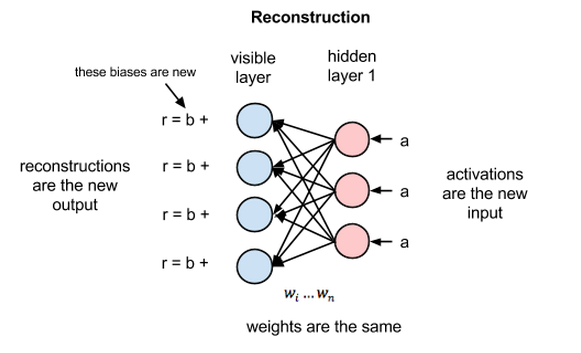

A Restricted Boltzmann Machine (RBM) is a popular choice for creating a generative model for protein sequences. RBMs are a type of generative stochastic artificial neural network that can learn to model the probability distribution of the input data.

In the case of protein sequences, an RBM can be trained on a dataset of one-hot encoded protein sequences, and it can learn to generate new 
sequences that are similar to the ones in the training dataset. The RBM consists of two layers: a visible layer, which represents the input sequences, and a hidden layer, which captures the underlying patterns in the data.

In [ ]:
# transforming the data from object to np.array 

data_nat = np.array(data_nat, dtype=np.float64)
labels_0 = np.array(labels_0, dtype=np.float64)

In [ ]:
#Importing the Restricted Boltzmann Machine

import numpy as np
from sklearn.neural_network import BernoulliRBM

In [ ]:
# testing it
## RBM with 3 visible input neuros and 2 neurons in the hidden layer

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
model = BernoulliRBM(n_components=2, learning_rate=0.3, verbose=None)
model.fit(X)

# Information about the model 
print("\n ")
#model.get_params()

# Generate new samples
X_generated = model.gibbs(X[:1])  # Using one random sample from the dataset as a starting point
X_generated_1 = model.gibbs(X[:1])
# pay heet that this model returns new samples with format array of array. if you want the element be careful to select x_gen[0]

In [ ]:
def from_bool_to_bin(x):
    '''
    function to transform an array of boolean type to binary (0,1) type 
    '''   
    x = np.ndarray.tolist(x)
    for i in range(len(x)):
      x[i] = int(x[i] == True)
    return np.array(x)


# testing
x = np.array([True, False])
x1 = from_bool_to_bin(x)
x1

array([1, 0])


------

Finally, **let's try this generative model with our sequences**

**model validation**

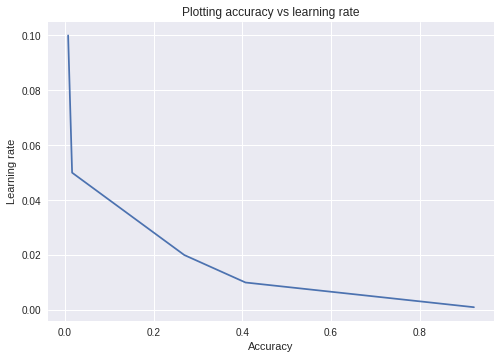

In [ ]:
l_rate = [0.1, 0.05, 0.02, 0.01, 0.001]
acc = []
for rate in l_rate:
  generative = BernoulliRBM(n_components=21, learning_rate = rate, verbose=None, batch_size=10, n_iter=10)
  generative.fit(data_nat)
  new = []
  
  for i in range(1000):
    new.append(from_bool_to_bin(generative.gibbs(data_nat[i])))

  prediction_1 = logistic.predict(new)
  accuracy = 0
  for i in range(len(prediction_1)):
    if prediction_1[i]==True:
      accuracy += 1
  accuracy = accuracy/len(prediction_1)
  acc.append(accuracy)

# plotting
plt.title("Plotting accuracy vs learning rate")
plt.plot(acc, l_rate)
plt.xlabel("Accuracy")
plt.ylabel("Learning rate")

plt.show()

In [ ]:
# create the generative BRM model
generative = BernoulliRBM(n_components=21, learning_rate=0.001, verbose=None, batch_size=10, n_iter=10)

# train it
generative.fit(data_nat)

BernoulliRBM(learning_rate=0.001, n_components=21, verbose=None)

In [ ]:
generative.get_params()

{'batch_size': 10,
 'learning_rate': 0.001,
 'n_components': 21,
 'n_iter': 10,
 'random_state': None,
 'verbose': None}

In [ ]:
new = []
for i in range(1000):
  new.append(from_bool_to_bin(generative.gibbs(data_nat[i])))

In [ ]:
prediction = logistic.predict(new)

In [ ]:
accuracy = 0
for i in range(len(prediction)):
  if prediction[i]==True:
    accuracy += 1
accuracy = accuracy/len(prediction)
accuracy

0.93

**Visualizing results:**

Text(0.5, 0.92, 'Scatter plot with the first three principal directions, Natural sequences')

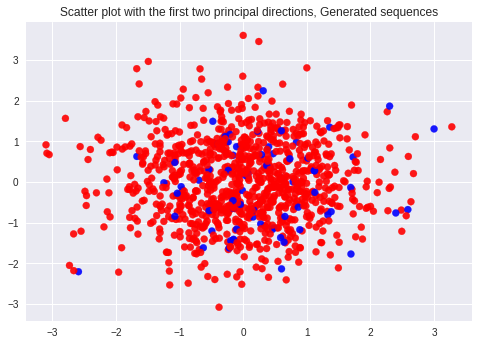

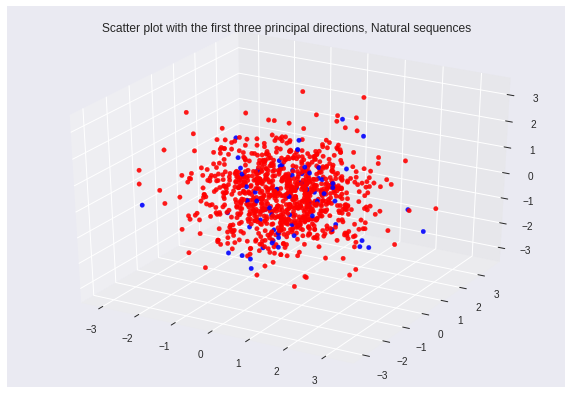

In [ ]:
# PCA

n_PC = 1000 
PCA_n = PCA(n_PC)
# PCA on generated data
seq_PCA_Gen = PCA_n.fit_transform(new)

plt.scatter(seq_PCA_Gen[:, 0], seq_PCA_Gen[:, 1], c=prediction, edgecolor='face', alpha=0.9,
            cmap="bwr")
plt.title("Scatter plot with the first two principal directions, Generated sequences")

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(seq_PCA_Gen[:, 0], seq_PCA_Gen[:, 1],seq_PCA_Gen[:, 2], c=prediction, alpha= 0.9, cmap="bwr")
plt.title("Scatter plot with the first three principal directions, Natural sequences")

-----------


### Extra


In [ ]:
#import tensorflow as tf
#!pip install --upgrade tensorflow


import tensorflow.compat.v1 as tf


class RBM(object):
    def __init__(self, visible_dim, hidden_dim, learning_rate, number_of_iterations):
        
        self._graph = tf.Graph()
        
        #Initialize graph
        with self._graph.as_default():
            
            self._num_iter = number_of_iterations
            self._visible_biases = tf.Variable(tf.random.uniform([1, visible_dim], 0, 1, name = "visible_biases"))
            self._hidden_biases = tf.Variable(tf.random.uniform([1, hidden_dim], 0, 1, name = "hidden_biases"))
            self._hidden_states = tf.Variable(tf.zeros([1, hidden_dim], tf.float32, name = "hidden_biases"))
            self._visible_cdstates = tf.Variable(tf.zeros([1, visible_dim], tf.float32, name = "visible_biases"))
            self._hidden_cdstates = tf.Variable(tf.zeros([1, hidden_dim], tf.float32, name = "hidden_biases"))
            self._weights = tf.Variable(tf.random.normal([visible_dim, hidden_dim], 0.01), name="weights")
            self._learning_rate =  tf.Variable(tf.fill([visible_dim, hidden_dim], learning_rate), name = "learning_rate")
            
            self._input_sample = tf.placeholder(tf.float32, [visible_dim], name = "input_sample")
            
            # Gibbs Sampling
            input_matrix = tf.transpose(tf.stack([self._input_sample for i in range(hidden_dim)]))
            _hidden_probabilities = tf.sigmoid(tf.add(tf.multiply(input_matrix, self._weights), tf.stack([self._hidden_biases[0] for i in range(visible_dim)])))
            self._hidden_states = self.callculate_state(_hidden_probabilities)
            _visible_probabilities = tf.sigmoid(tf.add(tf.multiply(self._hidden_states, self._weights), tf.transpose(tf.stack([self._visible_biases[0] for i in range(hidden_dim)]))))
            self._visible_cdstates = self.callculate_state(_visible_probabilities)
            self._hidden_cdstates = self.callculate_state(tf.sigmoid(tf.multiply(self._visible_cdstates, self._weights) + self._hidden_biases))
            
            #CD
            positive_gradient_matrix = tf.multiply(input_matrix, self._hidden_states)
            negative_gradient_matrix = tf.multiply(self._visible_cdstates, self._hidden_cdstates)
            
            new_weights = self._weights
            new_weights.assign_add(tf.multiply(positive_gradient_matrix, self._learning_rate))
            new_weights.assign_sub(tf.multiply(negative_gradient_matrix, self._learning_rate))

            self._training = tf.assign(self._weights, new_weights) 
            
            #Initilize session and run it
            self._sess = tf.Session()
            initialization = tf.global_variables_initializer()
            self._sess.run(initialization)
        
    def train(self, input_vects):
        for iter_no in range(self._num_iter):
            for input_vect in input_vects:
                self._sess.run(self._training,
                               feed_dict={self._input_sample: input_vect})
    
    def callculate_state(self, probability):
        return tf.floor(probability + tf.random.uniform(tf.shape(probability), 0, 1))

In [ ]:
test = np.array([[0,1,1,0], [0,1,0,0], [0,0,1,1]])
rbm = RBM(4, 3, 0.1, 100)
rbm.train(test) 

In [ ]:
rbm._visible_biases

<tf.Variable 'Variable:0' shape=(1, 4) dtype=float32>

In [ ]:
import numpy as np

class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_hidden = num_hidden
        self.num_visible = num_visible
        self.weights = np.random.randn(num_visible, num_hidden)
        self.visible_bias = np.random.randn(1, num_visible)
        self.hidden_bias = np.random.randn(1, num_hidden)

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def sample_hidden(self, visible_prob):
        hidden_prob = self.sigmoid(np.dot(visible_prob, self.weights) + self.hidden_bias)
        hidden_state = hidden_prob > np.random.rand(hidden_prob.shape[0], hidden_prob.shape[1])
        return hidden_prob, hidden_state

    def sample_visible(self, hidden_prob):
        visible_prob = self.sigmoid(np.dot(hidden_prob, self.weights.T) + self.visible_bias)
        visible_state = visible_prob > np.random.rand(visible_prob.shape[0], visible_prob.shape[1])
        return visible_prob, visible_state

    def train(self, data, num_epochs=100, batch_size=10, learning_rate=0.1):
        for epoch in range(num_epochs):
            for i in range(0, len(data), batch_size):
                batch = data[i:i+batch_size]
                visible_prob, visible_state = self.sample_visible(batch)
                hidden_prob, hidden_state = self.sample_hidden(visible_state)

                # update weights and biases
                self.weights += learning_rate * np.dot(batch.T, hidden_prob) / batch_size
                self.visible_bias += learning_rate * np.mean(batch - visible_prob, axis=0)
                self.hidden_bias += learning_rate * np.mean(hidden_state - hidden_prob, axis=0)

In [ ]:
# Initialize an RBM with -- visible units and -- hidden units
rbm = RBM(4, 2)

# Train the RBM on some data
data = np.array([[1, 1, 1, 1], [1, 1, 1, 1],[1, 1, 1, 1],[1, 1, 1, 1],[1, 1, 1, 1],[1, 1, 1, 1],[1, 1, 1, 1],[1, 1, 1, 1],[1, 1, 1, 1],[1, 0, 1, 0], [0, 0, 0, 1]])
rbm.train(data)


ValueError: ignored

In [ ]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image
%matplotlib inline



X = torch.from_numpy(data_nat)
Y = torch.from_numpy(labels_0)

In [ ]:
batch_size = 32

class RBM(nn.Module):
  '''
  k is the number of Gibbs sampling
  v(h)_bias = visible(hidden) bias
  W weights

  '''
   def __init__(self,
               n_vis=1920,
               n_hin=100,
               k=5):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.k = k
    
   def sample_from_p(self,p):
       return F.relu(torch.sign(p - Variable(torch.rand(p.size()))))
    
   def v_to_h(self,v):
        p_h = F.sigmoid(F.linear(v,self.W,self.h_bias))
        sample_h = self.sample_from_p(p_h)
        return p_h,sample_h
    
   def h_to_v(self,h):
        p_v = F.sigmoid(F.linear(h,self.W.t(),self.v_bias))
        sample_v = self.sample_from_p(p_v)
        return p_v,sample_v
        
   def forward(self,v):
        pre_h1,h1 = self.v_to_h(v)
        
        h_ = h1
        for _ in range(self.k):
            pre_v_,v_ = self.h_to_v(h_)
            pre_h_,h_ = self.v_to_h(v_)
        
        return v,v_
    
   def free_energy(self,v):
        vbias_term = v.mv(self.v_bias)
        wx_b = F.linear(v,self.W,self.h_bias)
        hidden_term = wx_b.exp().add(1).log().sum(1)
        return (-hidden_term - vbias_term).mean()


In [ ]:
rbm = RBM(k=1)
train_op = optim.SGD(rbm.parameters(),0.1)

for epoch in range(10):
    loss_ = []
    for _, (data) in enumerate(X):
        #data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.data)
        train_op.zero_grad()
        loss.backward()
        train_op.step()

    print("Training loss for {} epoch: {}".format(epoch, np.mean(loss_)))

RuntimeError: ignored